In [4]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.precision", 2)

mlp.__version__


'3.5.1'

# Visualization of Amounts

In this Jupyter notebook we will breakdown some concepts seen in the week 2 through the use of python library [Matplotlib 3.6.0 ](https://matplotlib.org/stable/index.html).


For the visualization of amounts it is necessary to have in our data set at least one categorical variable and one common quantitative variable.



## What are common types of charts for visualizing amounts?


*   (Vertical/Horizontal) Bar charts. 
*   Dots.



# What is a bar chart?


*   To graph categorical data.
*   Multiple rectangles aligned to a common baseline (default 0).
*   The data values from the quantitative variable is enconded by rectangle length.


To create our first bar chart we will use the data set shown in [Chapter 6](https://clauswilke.com/dataviz/visualizing-amounts.html). This data set is about the top five gross ticket sales for movies presented on a weekend in 2017.

In [5]:
# Dataset: Highest grossing movies for the weekend of December 22-24, 2017.
data= { 'rank': [1,2,3,4,5],
        'title': ['Star Wars: The Last Jedi', 'Jumanji: Welcome to the Jungle', 'Pitch Perfect 3', 'The Greatest Showman', 	'Ferdinand'],
        'weekend_gross':[71565498, 36169328, 19928525, 8805843, 7316746]}

df = pd.DataFrame(data=data)


df.head()

,rank,title,weekend_gross
0,1,Star Wars: The Last Jedi,71565498
1,2,Jumanji: Welcome to the Jungle,36169328
2,3,Pitch Perfect 3,19928525
3,4,The Greatest Showman,8805843
4,5,Ferdinand,7316746


## Creating a Simple Horizontal Bar Chart (matplotlib.pyplot.bar)

To make a bar plot/chart you must indicate


*   `x` or `labels`: The `x` coordinates fo the bars (e.g, `[0,1,2,3,4]`) or the category labels (e.g., `['Star wars', 'Jumanji']`).
*   `height`: the heights of the bars (e.g., weekend gross)


For more information, please visit the [matplotlib documentaion](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar).



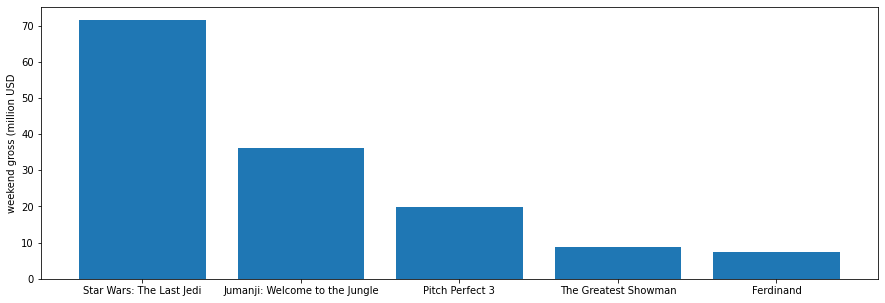

In [6]:
fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(df['title'], df['weekend_gross']/10**6) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_ylabel("weekend gross (million USD") # labeling the y-axis.
plt.show() # Show graphic


### Bar Chart Parameters

we are able to modify the bars (multiple or individual) through the following parameters:

*   `width` (`float` or `array`): define the width(s) of the bars (i.e., rectangles).
*  `align`: `{'center', 'edge'}`: define the aligment of the bars.



### Best practices for desining bar charts/plots: Bar `width`

The width of each bar (i.e., rectangle) sould be greater than the size of the gap between each other.



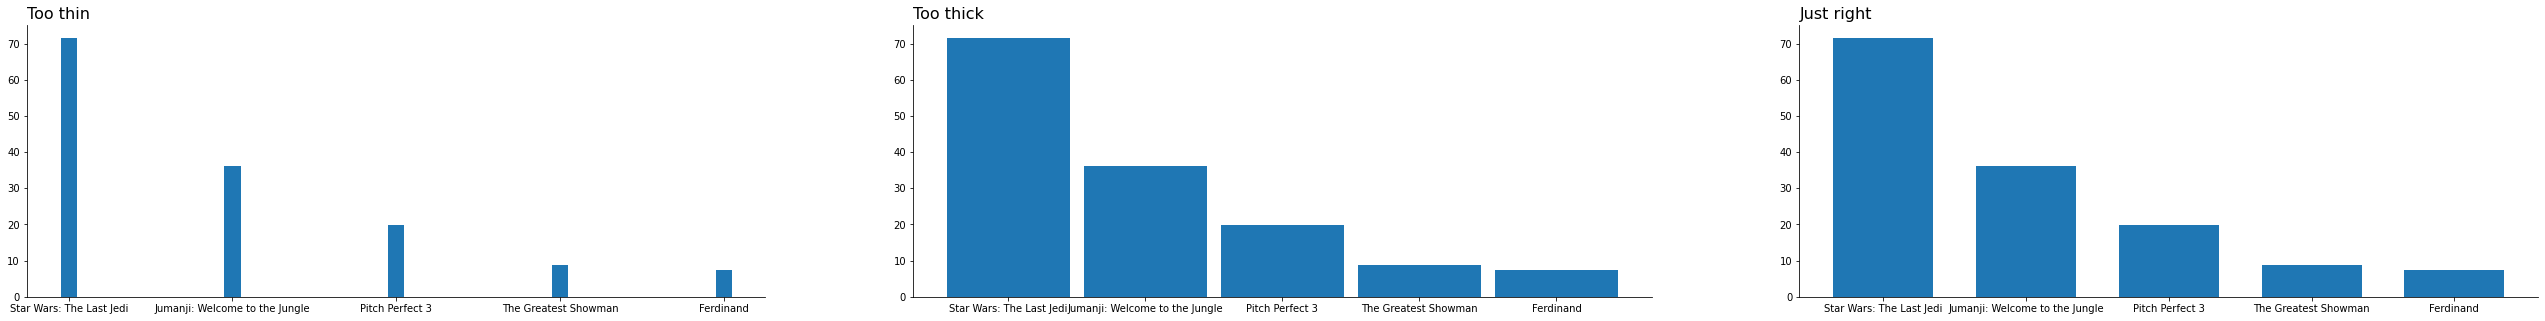

In [7]:
# declaring some list 
bar_widths = [0.1, 0.9, 0.7]
bar_labels = ['Too thin', 'Too thick', 'Just right']

# Create figure and Axes
fig, axs = plt.subplots(1,3,figsize=(45, 5)) # A figure (size width = 45, height=5) with three Axes.
   
#Create a bar per each bar width
for i,ax in enumerate(axs): 
  ax.bar(df['title'], df['weekend_gross']/10**6, width=bar_widths[i])
  ax.set_title(bar_labels[i], loc='left', fontsize=16)# Set title per bar chart
  ax.spines['right'].set_visible(False)# Hide the right spines
  ax.spines['top'].set_visible(False) # Hide the top spine
  
  

# Show graphic
plt.show()


### Parameter **`align`**
Alignment of the bars to the x coordinates:

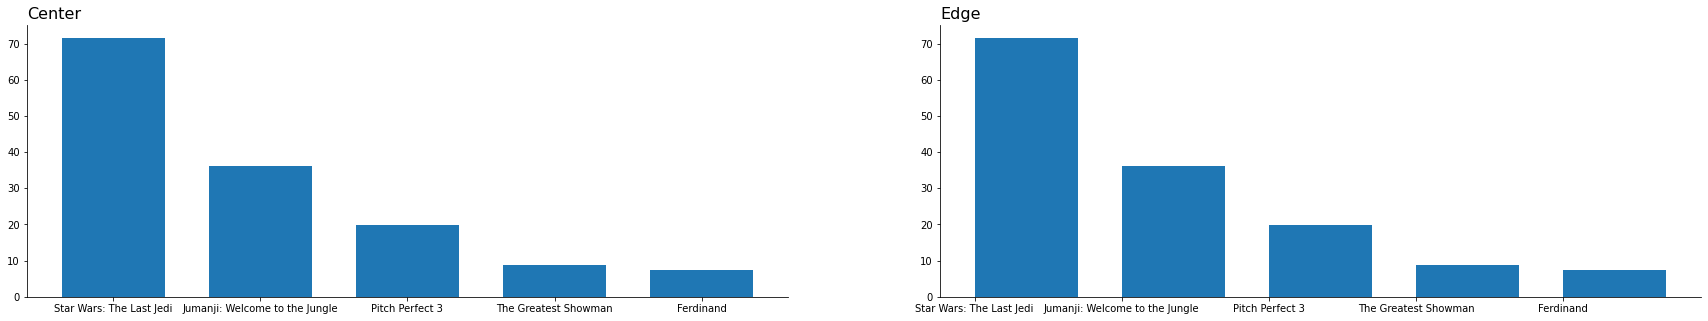

In [8]:
# declaring some list 
align = ['center', 'edge']
bar_labels = ['Center', 'Edge']

# Create figure and Axes
fig, axs = plt.subplots(1,2,figsize=(30, 5)) # A figure (size width = 45, height=5) with two Axes.
   
#Create a bar per each bar width
for i,ax in enumerate(axs): 
  ax.bar(df['title'], df['weekend_gross']/10**6, width=0.7, align=align[i])
  ax.set_title(bar_labels[i], loc='left', fontsize=16)# Set title per bar chart
  ax.spines['right'].set_visible(False)# Hide the right spines
  ax.spines['top'].set_visible(False) # Hide the top spine

### Parameter ** `color`**

The bar colors can be modified in two ways: 

* a `color`: defines the color of all bars (i.e., rectangles).
* list of `color`: defines the particular color of each bar in the chart.

To select colors I stronlgy recommend using [colorbrewer2 ](https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=4)

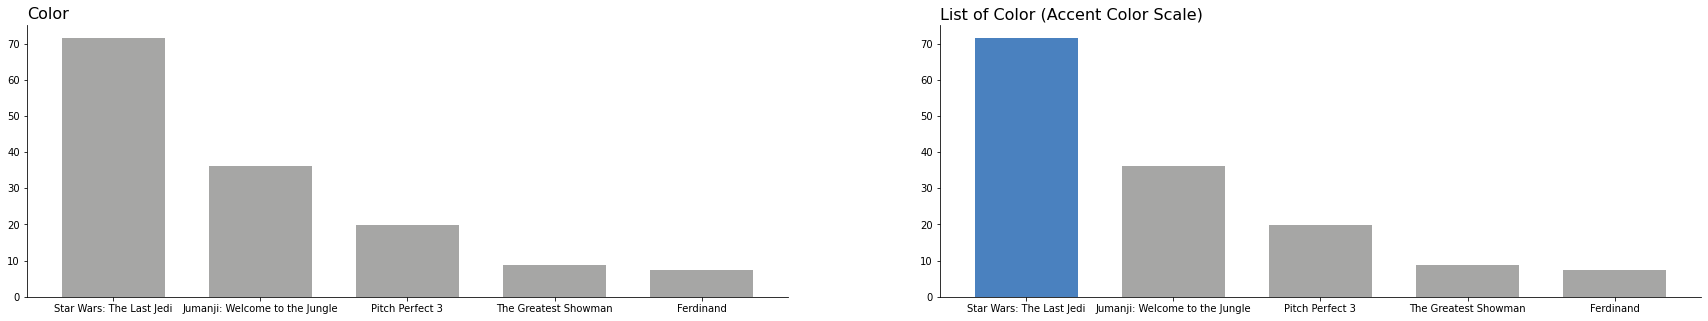

In [9]:
#Defining colors 
BLUE2 = '#4A81BF'
DELTA = '#A6A6A5'
barcolors = [DELTA] * len(df['title']) # declaring a color per each bar (starwars = delta color, jumanji delta color ) i.e., [DELTA, DELTA, DELTA, DELTA, DELTA]
barcolors[0] = BLUE2 # assigning the blue color to the bar that represents the star wars category. The objective is highlight the most popular movie.

labels = ['Color', 'List of Color (Accent Color Scale)']
colors = [DELTA, barcolors]
# Create figure and Axes
fig, axs = plt.subplots(1,2,figsize=(30, 5)) # A figure (size width = 45, height=5) with two Axes.
   
#Create a bar per each bar width
for i,ax in enumerate(axs):   
  ax.bar(df['title'], df['weekend_gross']/10**6, width=0.7, color=colors[i])
  ax.set_title(labels[i], loc='left', fontsize=16)# Set title per bar chart
  ax.spines['right'].set_visible(False)# Hide the right spines
  ax.spines['top'].set_visible(False) # Hide the top spine

In [10]:
barcolors

['#4A81BF', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#A6A6A5']

## Rotate the labels

When displaying vertical bar chart/plots, I recommend not to rotate the labels, since rotate labels are difficult to read.

However if you want to rotate the labels, you need to modify the parameter `rotation` on the `xticklabels`. The `rotation` angle in degrees in mathematically positive direction (counterclockwise). 'horizontal' equals 0, 'vertical' equals 90.

/var/folders/cj/jrtw4xk97tsfqpryw6wfv2w40000gn/T/ipykernel_1125/1578377932.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['title'], rotation=45, ha='right',fontsize=14)# label rotation at 45 degrees.
/var/folders/cj/jrtw4xk97tsfqpryw6wfv2w40000gn/T/ipykernel_1125/1578377932.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='y', color=DELTA, linewidth=0.3) # showing the grid lines just for the y-axis.


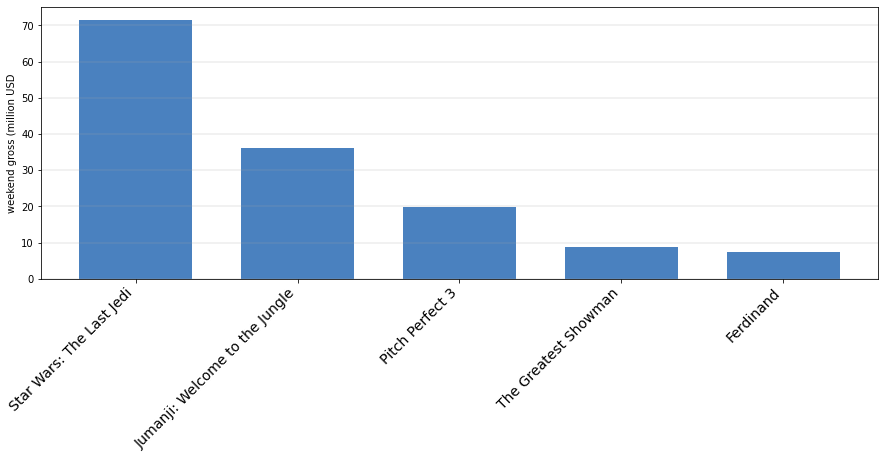

In [11]:
#Defining colors 
BLUE2 = '#4A81BF'
DELTA = '#A6A6A5'

fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(df['title'], df['weekend_gross']/10**6, width=0.7, color=BLUE2) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_ylabel("weekend gross (million USD") # labeling the y-axis.
ax.set_xticklabels(df['title'], rotation=45, ha='right',fontsize=14)# label rotation at 45 degrees.


ax.grid(b=True, which='major', axis='y', color=DELTA, linewidth=0.3) # showing the grid lines just for the y-axis.
plt.show() # Show graphic


## Creating a Simple Horizontal Bar Chart ([matplotlib.pyplot.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html))


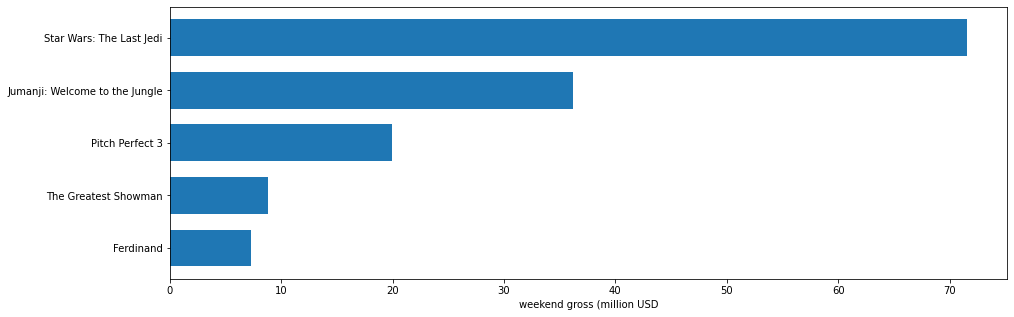

In [12]:
df.sort_values(by='weekend_gross', inplace=True) # sorting the dataset by the weekend_gross (ascending way).
fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.barh(df['title'], df['weekend_gross']/10**6, height=0.7) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_xlabel("weekend gross (million USD") # labeling the y-axis.
plt.show() # Show graphic

### An Improved Version of the Horizontal Bar Chart




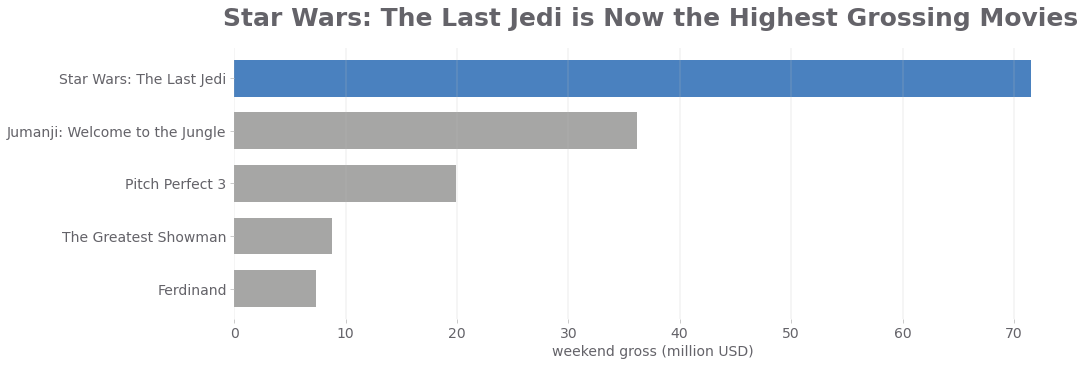

In [13]:
#Defining colors 
BLUE2 = '#4A81BF'
DELTA = '#A6A6A5'
GRAY9 = '#BFBEBE'
GRAY3 = '#555655'
GRAY4 = '#646369'
GRAY7 = '#929497'

barcolors = [DELTA] * len(df['title']) 
barcolors[-1] = BLUE2 

df.sort_values(by='weekend_gross', inplace=True) # sorting the dataset by the weekend_gross (ascending way).

fig, ax = plt.subplots(figsize=(15, 5)) 



ax.barh(df['title'], df['weekend_gross']/10**6, height=0.7, color=barcolors) 
ax.set_xlabel("weekend gross (million USD)", fontsize=14, color=GRAY4) 


ax.tick_params(which='major', length=4, color=GRAY9, labelcolor=GRAY4, labelsize=14)
# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#adding the grid lines for x-axis
ax.grid(visible=True, which='major', axis='x', color=GRAY9, lw=0.3) 

ax.text(-1, 5,
         "Star Wars: The Last Jedi is Now the Highest Grossing Movies", 
        fontsize=25, 
        color=GRAY4, 
        fontweight='bold')

plt.show() 

# What is a  group/clusterd bar chart?

To visualize one numerical varaible and  two categorical variables  at the same time.

### Example Dataset: Weighted Perfomance Index

In [14]:
# Dataset: Weighted Performance Index.
data= { 'Category': ['Price', 'Convenience', 'Relationship', 'Service', 'Selection'],
        'Our business': [1.81, 1.70, 0.70, 0.31, 0.26],
        'Competitor A': [1.59, 2.18, 1.98, 0.50, 0.27],
        'Competitor B': [0.26, 0.72, 0.62, 1.23, 0.87],
        'Competitor C': [1.02, 0.82, 0.67, 0.69, 0.43],
        'Rank': ['1 of 6', '2 of 6', '4 of 6', '6 or 6', '6 of 6']
        }

df = pd.DataFrame(data=data)


df.head()

,Category,Our business,Competitor A,Competitor B,Competitor C,Rank
0,Price,1.81,1.59,0.26,1.02,1 of 6
1,Convenience,1.70,2.18,0.72,0.82,2 of 6
2,Relationship,0.70,1.98,0.62,0.67,4 of 6
3,Service,0.31,0.50,1.23,0.69,6 or 6
4,Selection,0.26,0.27,0.87,0.43,6 of 6


In a group/clusterd bar, we draw a group of bar at each position along the x-axis, determined by one categorical variable and then we draw bar within each group according to the other categorical variable.

For example, in the following group bar, we start by adding for the first company the bars corresponding to price, convience, relationship. Then we add competitor A.  

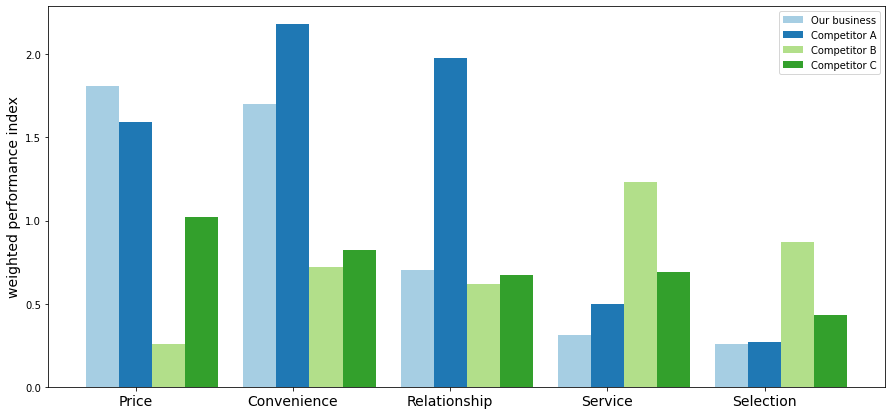

In [15]:
# Defininf colors
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_width = 0.21

x_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.bar(x_pos + i*bar_width, df[col], width=bar_width,  label=col, color=qual_colors[i])
  
ax.set_ylabel('weighted performance index', fontsize=14)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(df['Category'], fontsize=14)

ax.legend()

plt.show()

### How to Change the Position of a Legend in Matplotlib 

To change the location of the legend, you need to modify the `loc` parameter in [`legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). 

In [16]:
legend_locations = ['best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center','upper center','center' ]

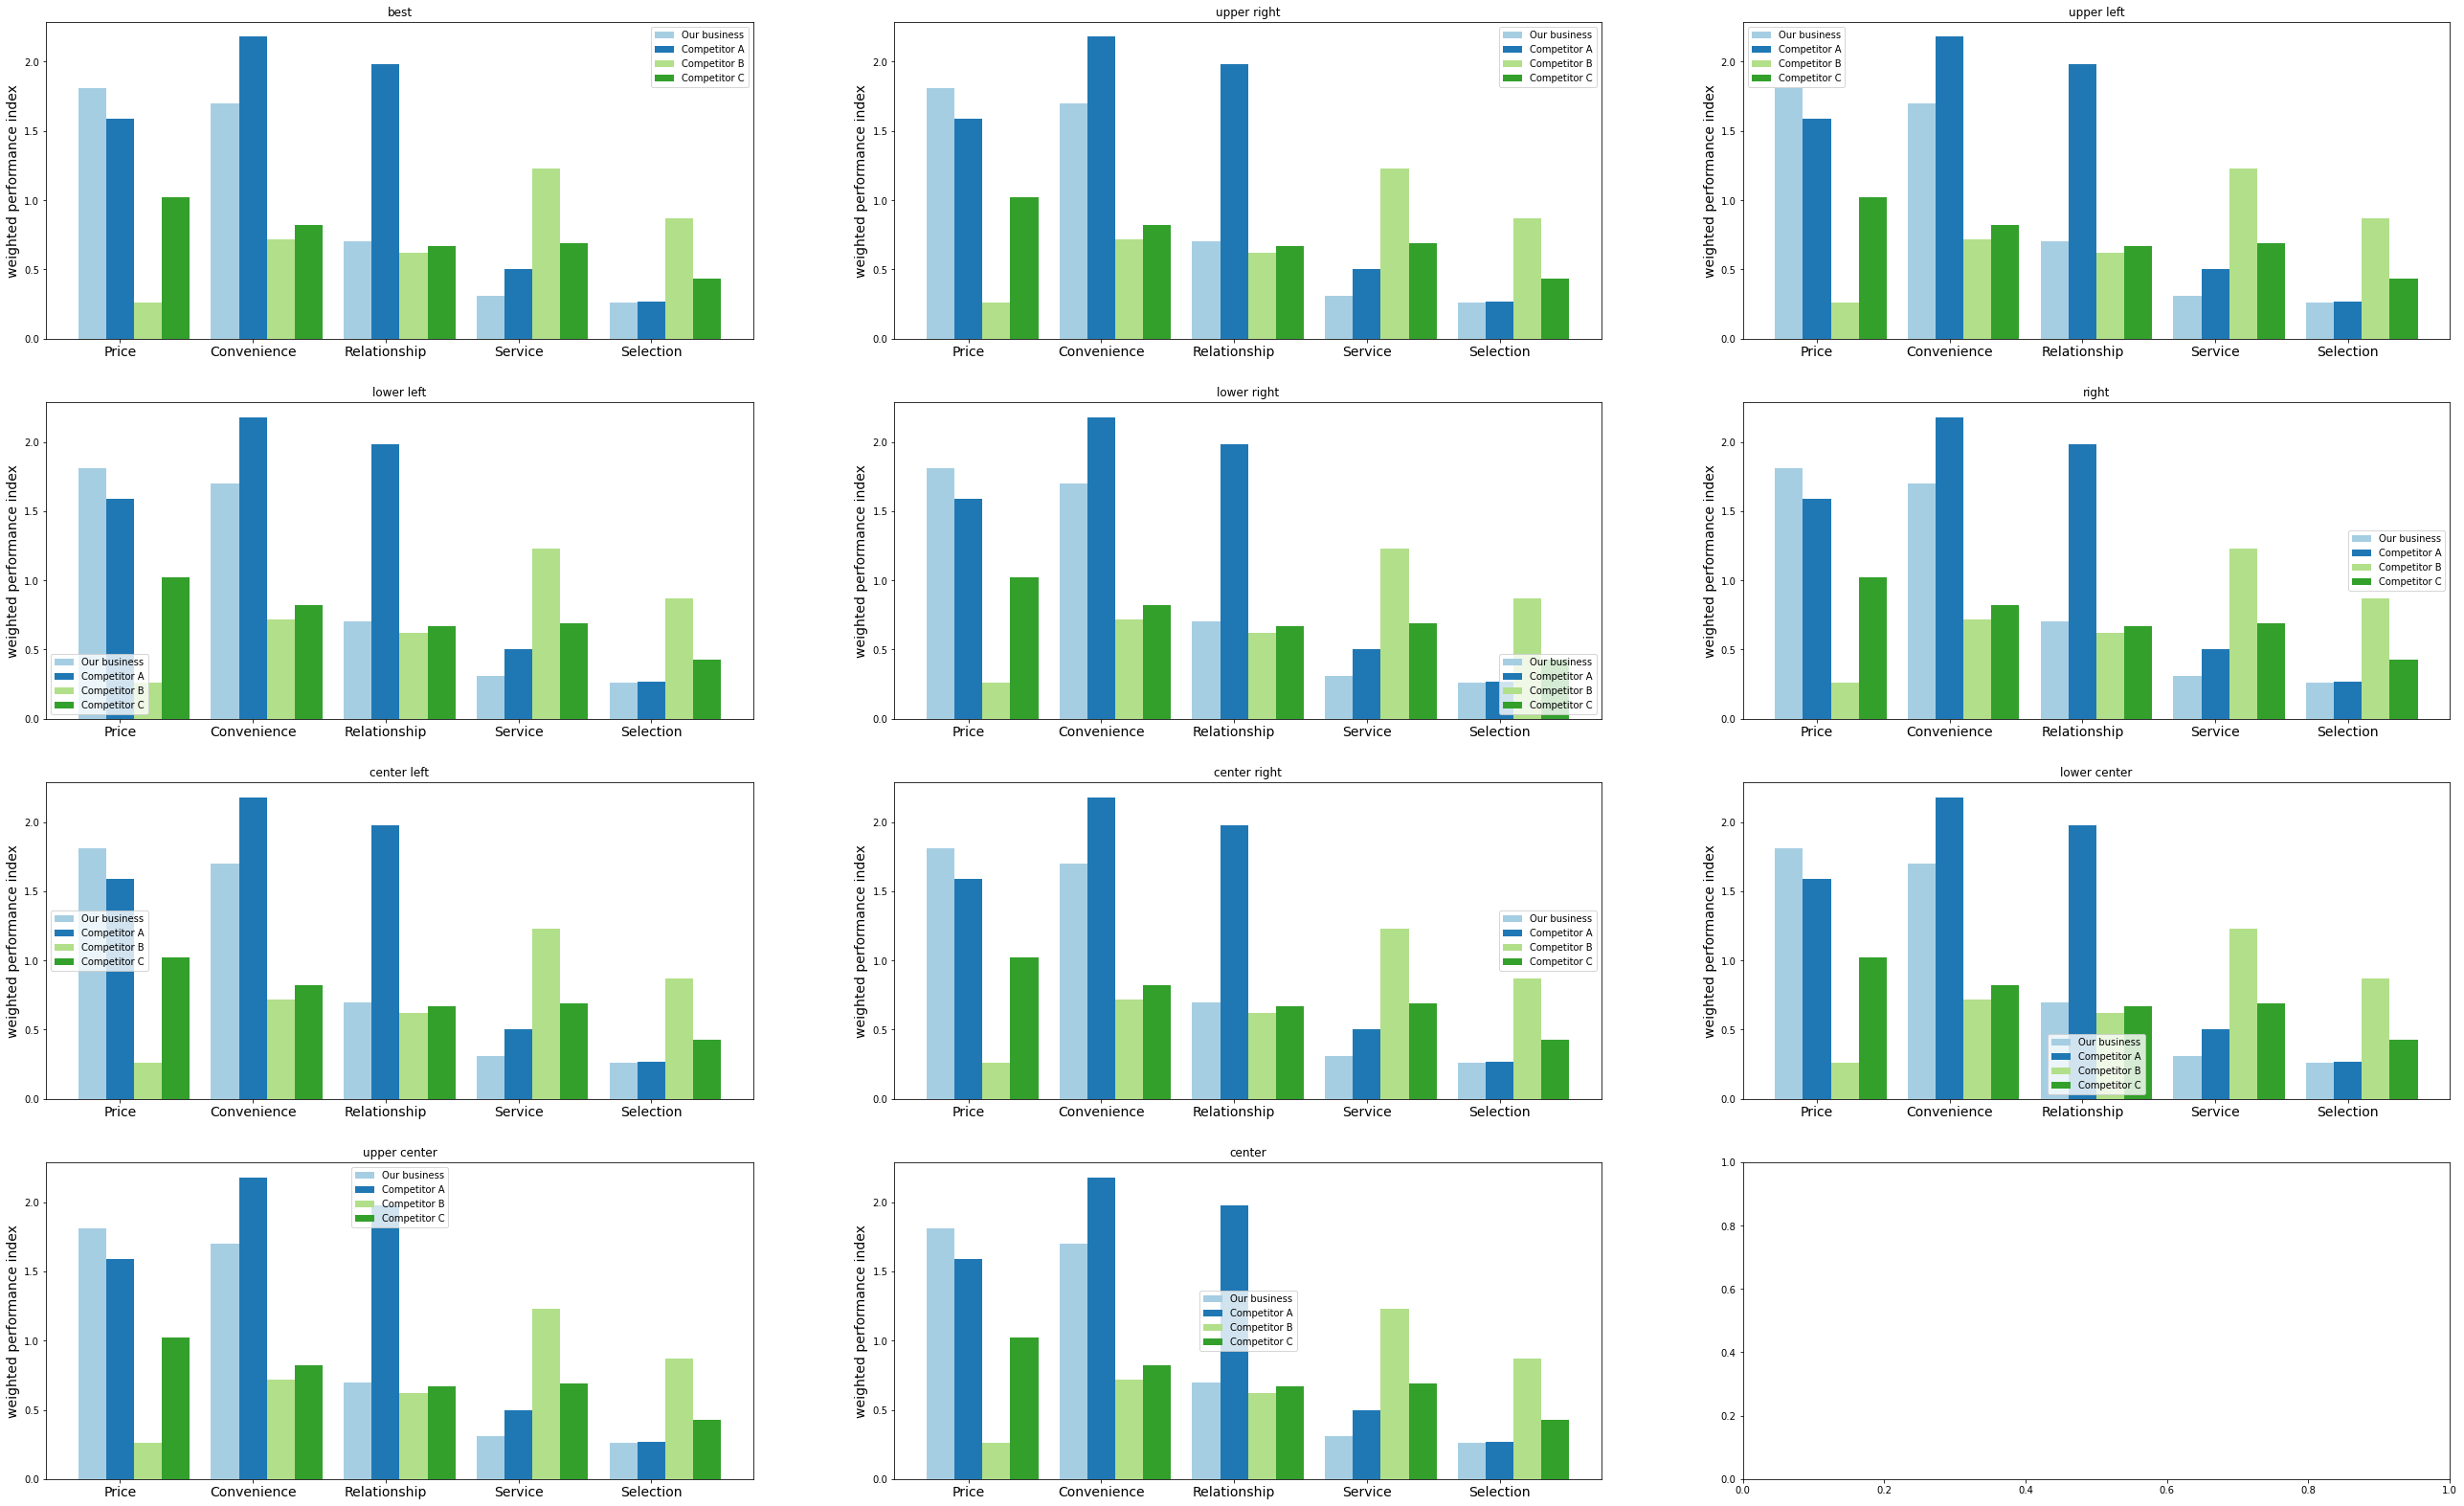

In [17]:
# Create figure and Axes
nrows, ncols = 4,3
fig, axs = plt.subplots(nrows,ncols, figsize=(15*3,7*4)) # A figure (size width = 45, height=5) with two Axes.

bar_width = 0.21
x_pos = np.arange(len(df)) #bar location per category


for i, legend_loc in enumerate(legend_locations):
  row, col = i//3, i%3
  for j, colName in enumerate(df.columns[1:-1]):
    axs[row,col].bar(x_pos + j*bar_width, df[colName], width=bar_width,  label=colName, color=qual_colors[j])
    axs[row,col].set_title(legend_loc)
    axs[row,col].set_ylabel('weighted performance index', fontsize=14)
    axs[row,col].set_xticks(x_pos + bar_width)
    axs[row,col].set_xticklabels(df['Category'], fontsize=14)
    axs[row,col].legend(loc=legend_loc) # the location fo the legend



`bbox_to_ancho`: Box that is used to position the legend in conjunction with `loc`. This arguement allows arbitrary placement of the legend (*e.g.*, locate the legen out of the plot). bbox_to_anchor  is defined as a 4-tuple `(x,y,width,height)`.

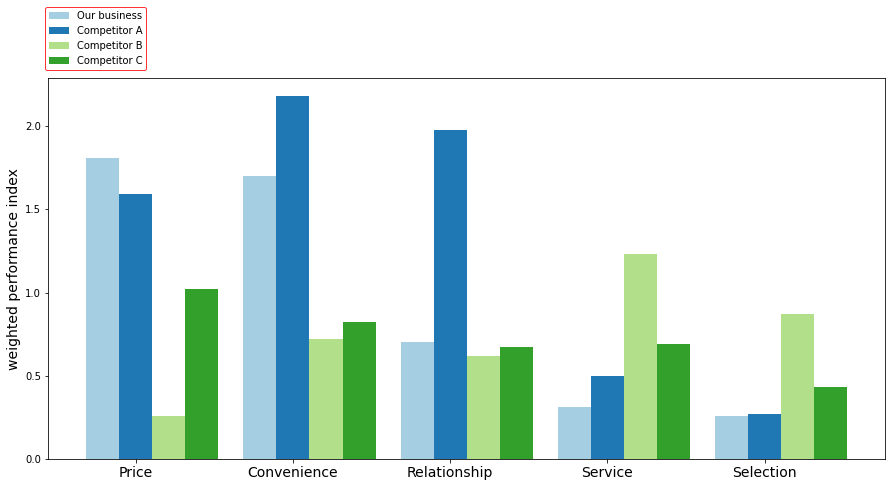

In [18]:
# Defininf colors
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_width = 0.21

x_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.bar(x_pos + i*bar_width, df[col], width=bar_width,  label=col, color=qual_colors[i])
  
ax.set_ylabel('weighted performance index', fontsize=14)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(df['Category'], fontsize=14)
ax.legend(loc='upper left',bbox_to_anchor=(-0.01, 1.2), edgecolor='red') # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.

plt.show()

### Ncols
Another parameter that you can modify to the legend is the number of columns (`ncols`). `ncols` is the number of columns that the legend has.  

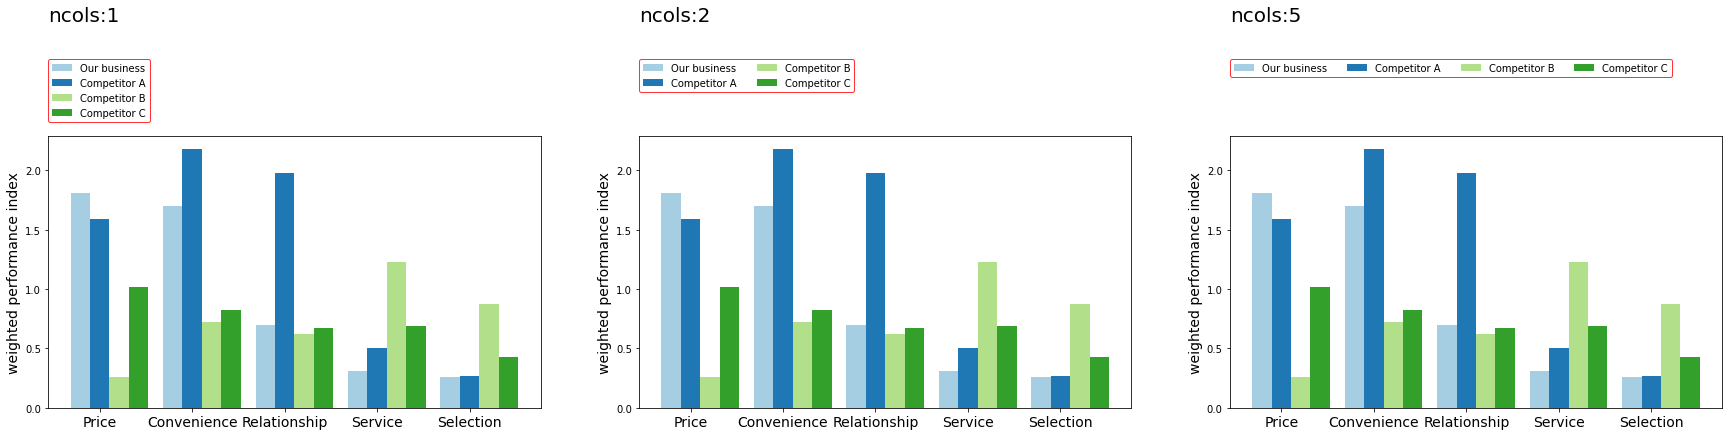

In [19]:
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']
ncols_lst = [1, 2, 5] # defining the number of column for the legend

bar_width = 0.21

x_pos = np.arange(len(df)) #bar location per category


# Create figure and Axes
fig, axs = plt.subplots(1,3,figsize=(30, 5)) # A figure (size width = 45, height=5) with two Axes.
   
#Create a bar per each bar width
for i,ax in enumerate(axs):
   for j, colName in enumerate(df.columns[1:-1]):
      ax.bar(x_pos + j*bar_width, df[colName], width=bar_width,  label=colName, color=qual_colors[j])
      ax.set_title(f'ncols:{ncols_lst[i]}', y=1.4, loc='left', fontsize=20)
      ax.set_ylabel('weighted performance index', fontsize=14)
      ax.set_xticks(x_pos + bar_width)
      ax.set_xticklabels(df['Category'], fontsize=14)
      ax.legend(loc='upper left',bbox_to_anchor=(-0.01, 1.3), edgecolor='red', ncol=ncols_lst[i]) # the location fo the legend


### An Improved Version of the Group/Clusterd Bar Chart


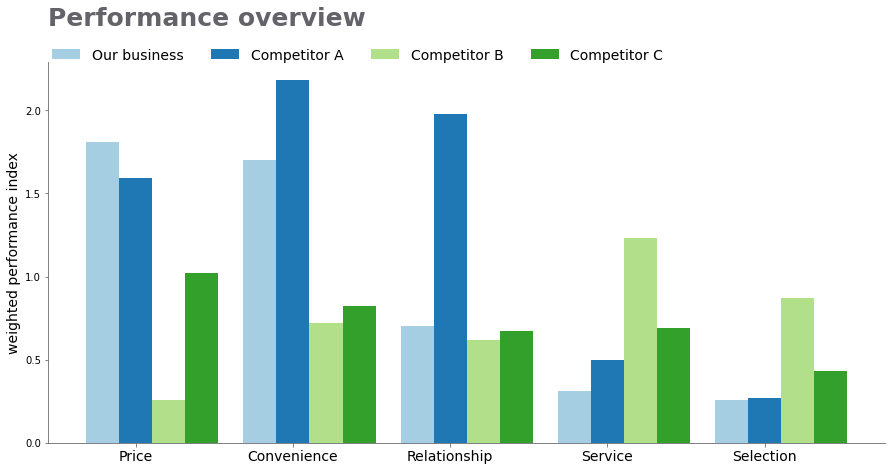

In [20]:
# Defininf colors
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_width = 0.21

x_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.bar(x_pos + i*bar_width, df[col], width=bar_width,  label=col, color=qual_colors[i])
  
ax.set_ylabel('weighted performance index', fontsize=14)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(df['Category'], fontsize=14)
ax.legend(loc='upper left',bbox_to_anchor=(-0.01, 1.07), frameon=False, ncol=5, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.


# Change ticks color and add spines colors
ax.tick_params(color=GRAY4)
ax.spines['bottom'].set_color(GRAY4)
ax.spines['left'].set_color(GRAY4)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_title('Performance overview', fontsize=25, color=GRAY4, fontweight='bold', y=1.08, loc='left')

plt.show()

### Horizontal Group/Clusterd Bar Chart


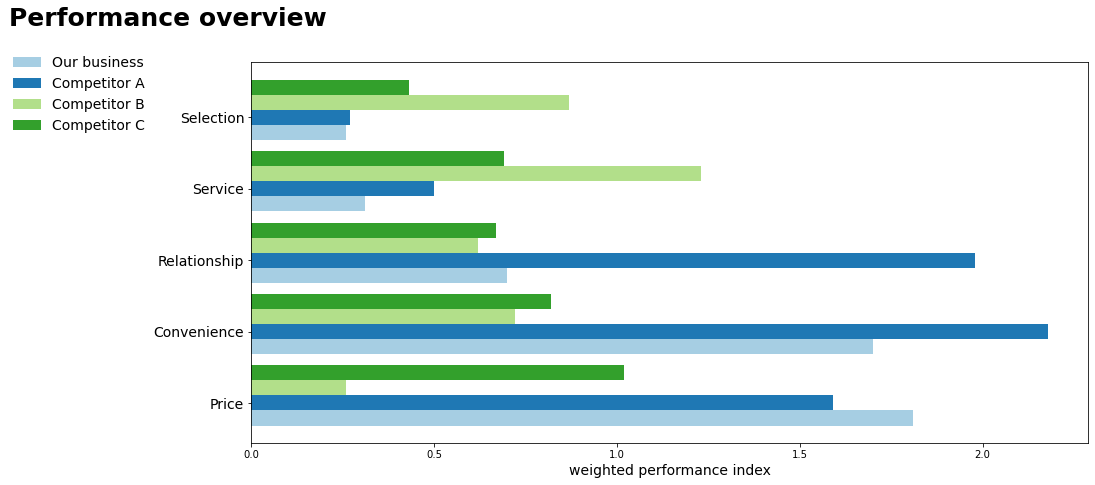

In [21]:
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=qual_colors[i],label=col)

ax.set_xlabel('weighted performance index', fontsize=14)
ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left')


plt.show()

I wnat to show first the category for which our business has the best performances. For this reason, I will sort the table base on the `our business column`


In [22]:
df.head()

,Category,Our business,Competitor A,Competitor B,Competitor C,Rank
0,Price,1.81,1.59,0.26,1.02,1 of 6
1,Convenience,1.70,2.18,0.72,0.82,2 of 6
2,Relationship,0.70,1.98,0.62,0.67,4 of 6
3,Service,0.31,0.50,1.23,0.69,6 or 6
4,Selection,0.26,0.27,0.87,0.43,6 of 6


In [23]:
df = df.sort_values(by=['Our business'], ascending=True) # Sorting ascending since the BARH show the fist element at the bottom of the plot.
df.head()

,Category,Our business,Competitor A,Competitor B,Competitor C,Rank
4,Selection,0.26,0.27,0.87,0.43,6 of 6
3,Service,0.31,0.50,1.23,0.69,6 or 6
2,Relationship,0.70,1.98,0.62,0.67,4 of 6
1,Convenience,1.70,2.18,0.72,0.82,2 of 6
0,Price,1.81,1.59,0.26,1.02,1 of 6


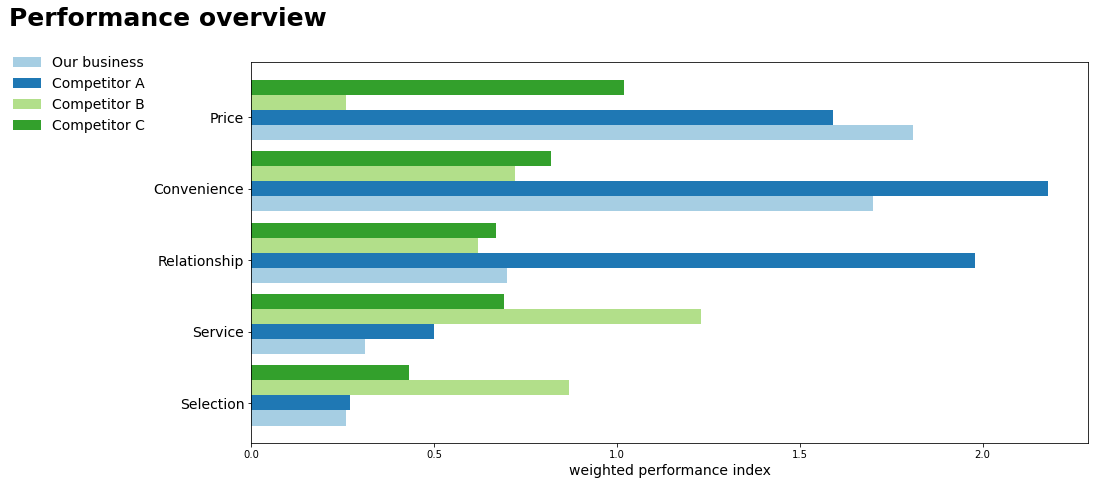

In [24]:
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=qual_colors[i],label=col)

ax.set_xlabel('weighted performance index', fontsize=14)
ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left')


plt.show()

### Gestalt Principles  of Visual Perception: Closure

The principle of closure states that when we look at a complex arrangement of visual elements, we tend to look for a single, recognizable pattern. That is, when you seen an image that has missing parts, you brain will fill in the blanks and make a complete image.

**[Tip]** We can remove borders and background shading. Also remove unnecesary elements.

To remove the frame border, you can indicate which part of the border you want to disappear. 

*  Top: `ax.spines['top'].set_visible(False)`
*  Right: `ax.spines['right'].set_visible(False)`
*  Bottom: `ax.spines['bottom'].set_visible(False)`
*  Left: `ax.spines['left'].set_visible(False)`  


In case we want to remove all the border, please use the following codelines:



> `for spine in plt.gca().spines.values():`
>> `spine.set_visible(False)`










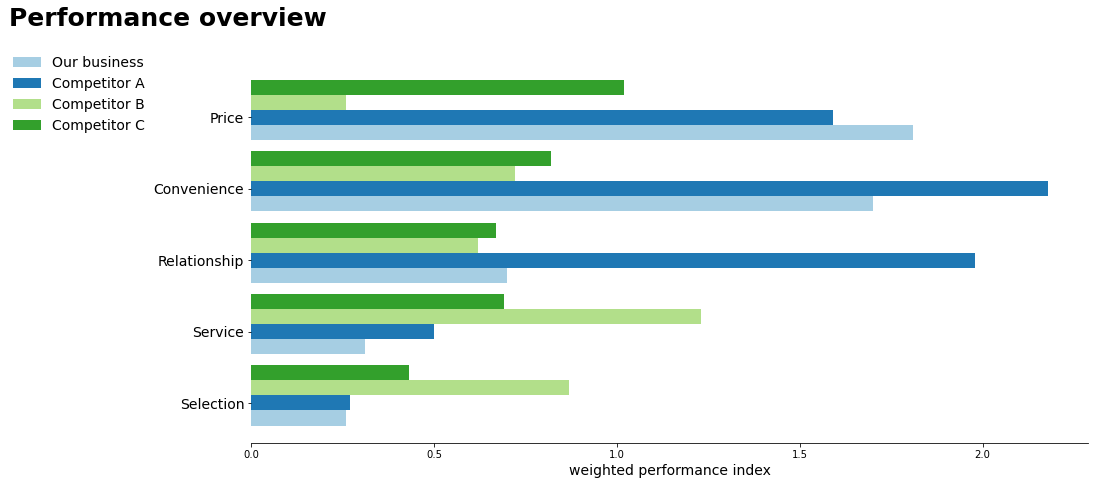

In [25]:
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

for i, col in enumerate(df.columns[1:-1]):
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=qual_colors[i],label=col)

ax.set_xlabel('weighted performance index', fontsize=14)
ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left')

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.show()

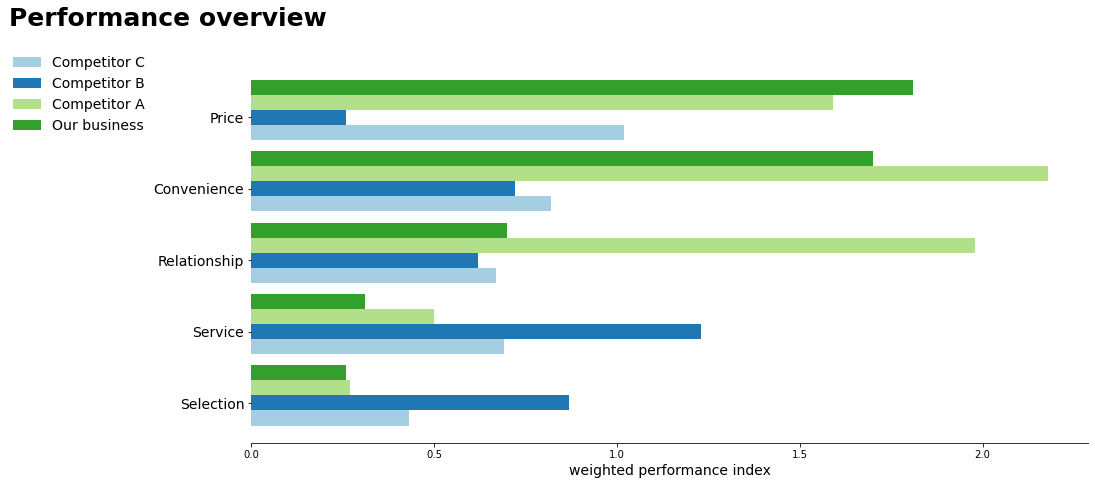

In [26]:
qual_colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c']

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

cols = df.columns[1:-1]
cols = cols[::-1]#reverting col

for i, col in enumerate(cols):
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=qual_colors[i],label=col)

ax.set_xlabel('weighted performance index', fontsize=14)
ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left')

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.show()

### Choosing an Accent Color Scale to Highlight Our Business(Category). 

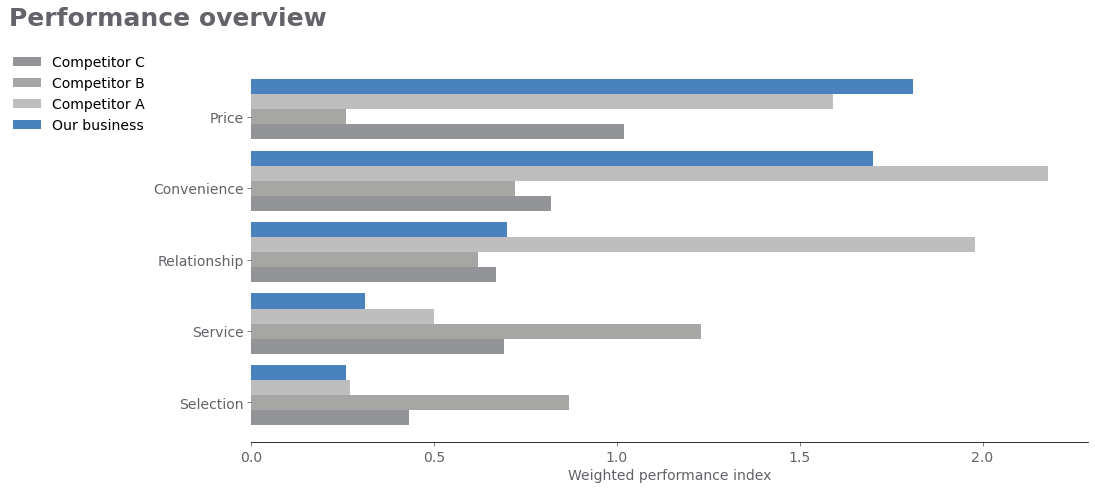

In [27]:
GRAY4 = '#646369'
GRAY7, GRAY8, GRAY9 = '#929497','#A6A6A5','#BFBEBE'
BLUE2 = '#4A81BF' # accent color
accent_cs = [GRAY7, GRAY8, GRAY9,BLUE2]

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

cols = df.columns[1:-1]
cols = cols[::-1]#reverting col

for i, col in enumerate(cols):
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=accent_cs[i],label=col)

ax.set_xlabel('Weighted performance index', fontsize=14, color=GRAY4)
ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left', color=GRAY4)

ax.tick_params(which='major', length=4, color=GRAY4, labelcolor=GRAY4, labelsize=14)
# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)


plt.show()

### Adding Text
Add the text `s` to the Axes at location `x`, `y` in data coordinates.
`matplotlib.pyplot.text(x, y, s)` [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)


Since I want to show what is the ranking of the company compared to the competitors I add the corresponding tag to the rank column at the end of each company bar. 

To add labels to bars in the given `Bar Container' we used [Axes.bar_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label)

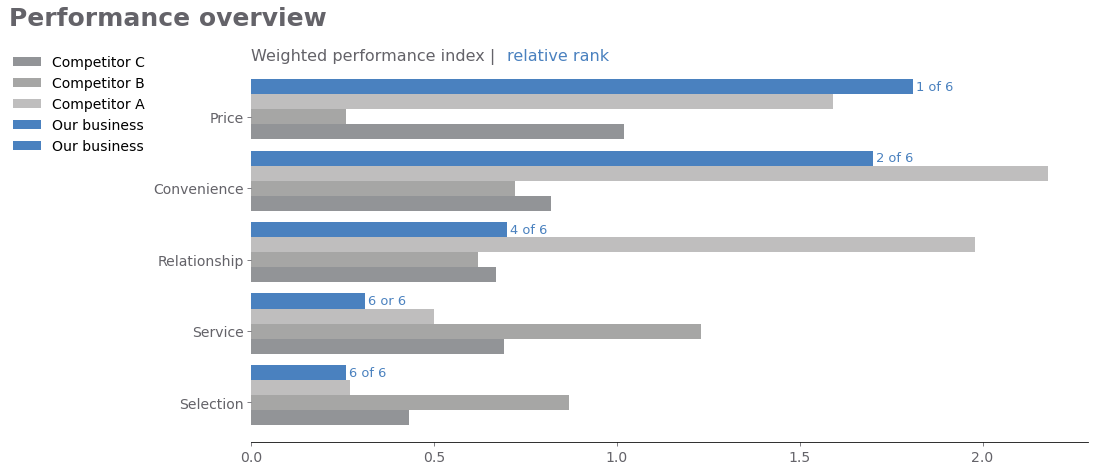

In [28]:
GRAY4 = '#646369'
GRAY7, GRAY8, GRAY9 = '#929497','#A6A6A5','#BFBEBE'
BLUE2 = '#4A81BF' # accent color
accent_cs = [GRAY7, GRAY8, GRAY9,BLUE2]

fig, ax = plt.subplots(figsize=(15,7)) 
bar_heigth = 0.21

y_pos = np.arange(len(df)) #bar location per category

cols = df.columns[1:-1]
cols = cols[::-1]#reverting col

for i, col in enumerate(cols):
  if col == 'Our business':
     rectsOur = ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=accent_cs[i],label=col)
  
  ax.barh(y_pos + i*bar_heigth , df[col], height=bar_heigth, color=accent_cs[i],label=col)
  

ax.set_yticks(y_pos + bar_heigth)
ax.set_yticklabels(df['Category'], fontsize=14)

ax.legend(loc='upper left',bbox_to_anchor=(-0.3, 1.05), frameon=False, fontsize=14) # here I locate the legend (x=-0.01, y=1.2) upper left. Also I modify the border-color property to red.
ax.set_title('Performance overview', fontsize=25,  fontweight='bold',x=-0.29, y=1.08, loc='left', color=GRAY4)

ax.tick_params(which='major', length=4, color=GRAY4, labelcolor=GRAY4, labelsize=14)
# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.text(0,5,'Weighted performance index |', fontsize=16, color=GRAY4)
ax.text(0.7,5,'relative rank ', fontsize=16, color=BLUE2)

ax.bar_label(rectsOur, labels=df['Rank'], padding=3, fontsize=13, color=BLUE2)
plt.show()

# What is a Stack Bar?

## Lego Dataset

In the following dataset I show a summary of the number of lego data sets by lego theme and year. 

This data analysis was done using the tables `sets table` and `themes table`  of the **Lego Catalog Database**. To learn more about this database visit the following website [Rebrickable](https://rebrickable.com/downloads/). 


In [29]:
url_lego = 'https://raw.githubusercontent.com/3eltran23/InfoViz/master/LegoTotalSetsPerYear.csv'

# reading dataframe
df_lego = pd.read_csv(url_lego)
df_lego = df_lego[df_lego['year']> 2017]
df_lego.head(11)

,year,Harry Potter,Marvel,Others,Star Wars
6,2018,42.0,10.0,763.0,69.0
7,2019,9.0,3.0,878.0,57.0
8,2020,30.0,4.0,887.0,46.0
9,2021,18.0,29.0,1008.0,37.0
10,2022,15.0,18.0,710.0,38.0


# Creating a Simple Vertical Stack Bar Chart 

To create a vertical stack bar chart is similar to creating a vertical bar chart by using `matplotlib.pyplot.bar`. The main difference is to add the bars (rectangle) of the next category that we want to stack, we have to indicate where the next bars will start. For this we use the `bottom` parameter.



*   `bottom` : The `y` coordinate(s) of the bottom side(s) of the bars.



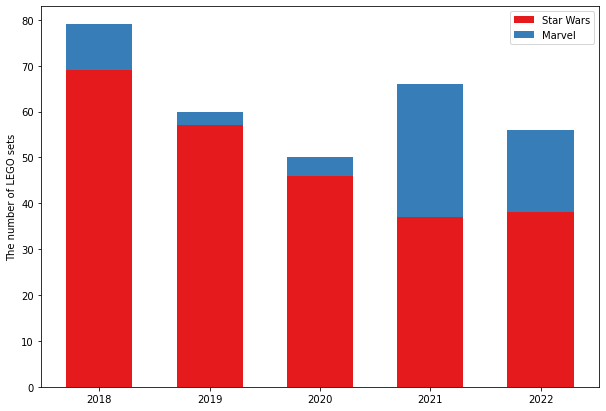

In [30]:
labels = ['Star Wars', 'Marvel', 'Harry Potter', 'Others']
qcs =['#e41a1c','#377eb8','#4daf4a','#ffff33']
width = 0.6 

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(df_lego['year'], df_lego['Star Wars'], width=width, label='Star Wars', color=qcs[0])
ax.bar(df_lego['year'], df_lego['Marvel'], width=width, label='Marvel', color=qcs[1], bottom=df_lego['Star Wars']) # here we indicate that the marvel bars will start after the bars of star wars
ax.set_ylabel('The number of LEGO sets')
ax.legend()

plt.show()



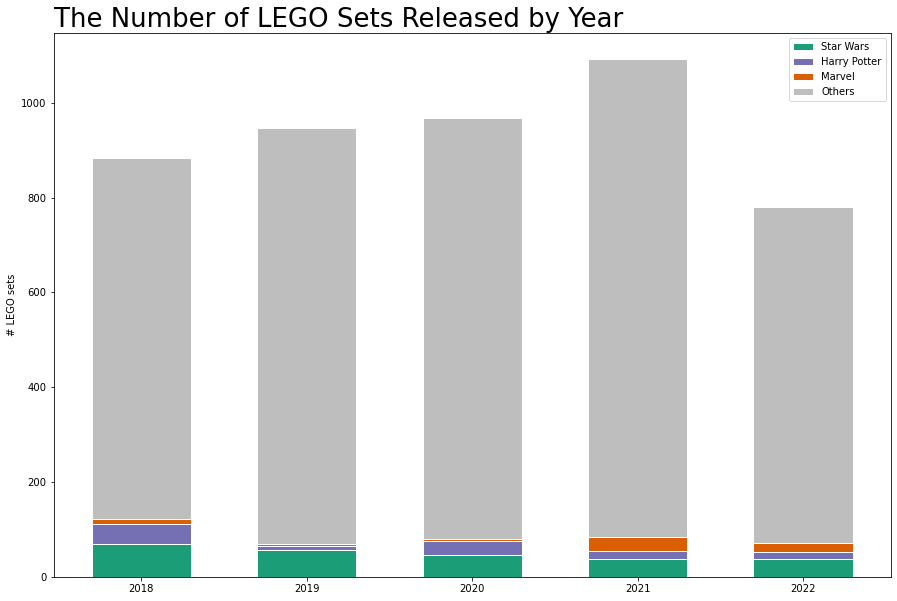

In [31]:
labels = ['Star Wars', 'Harry Potter', 'Marvel','Others' ]
qcs =['#1b9e77','#7570b3','#d95f02','#BFBEBE']
width = 0.6 

bottom = np.zeros((len(df_lego),), dtype=int)  # bottom accumulates starting points


fig, ax = plt.subplots(figsize=(15,10))

for pos, label in enumerate(labels):
  
    ax.bar(df_lego['year'], df_lego[label], width=width, label=label, color=qcs[pos], bottom=bottom,edgecolor='white')
    bottom = bottom +  df_lego[label]
 
ax.set_ylabel('# LEGO sets')
ax.legend()
ax.set_title('The Number of LEGO Sets Released by Year', fontsize=26, loc='left')

plt.show()

# Dot plots

### Example: Life expectancies of countries in the Americas, for the year 2020. 

I obtained the information from [the World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2020&start=1960).

In [32]:
url_le = 'https://raw.githubusercontent.com/3eltran23/InfoViz/master/LifeExpectancyTheAmericas.csv'


df_le = pd.read_csv(url_le)
df_le = df_le.sort_values(by='2020') #sort by life expectancy
df_le.tail(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,Cuba,CUB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,63.83,64.45,65.07,65.69,66.33,66.96,...,78.45,78.48,78.52,78.56,78.61,78.66,78.73,78.80,78.89,NaN
18,Puerto Rico,PRI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,68.72,68.94,69.15,69.36,69.59,69.87,...,78.85,79.03,79.20,79.35,79.49,79.63,79.78,79.93,80.09,NaN
4,Chile,CHL,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,57.22,57.62,58.03,58.47,58.93,59.41,...,79.18,79.35,79.50,79.65,79.78,79.91,80.04,80.18,80.33,NaN
6,Costa Rica,CRI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,60.38,61.02,61.64,62.24,62.81,63.35,...,79.07,79.23,79.40,79.56,79.74,79.91,80.09,80.28,80.47,NaN
3,Canada,CAN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,71.13,71.35,71.37,71.38,71.78,71.87,...,81.65,81.75,81.80,81.90,81.90,81.90,82.05,82.05,81.75,NaN


In [33]:
df_le.iloc[:,[0,-3, -4,-3,-2]].tail(10)

,Country Name,2019,2018,2019,2020
9,Ecuador,77.01,76.80,77.01,77.22
23,United States,78.79,78.64,78.79,77.28
5,Colombia,77.29,77.11,77.29,77.46
22,Uruguay,77.91,77.77,77.91,78.06
16,Panama,78.51,78.33,78.51,78.68
7,Cuba,78.80,78.73,78.80,78.89
18,Puerto Rico,79.93,79.78,79.93,80.09
4,Chile,80.18,80.04,80.18,80.33
6,Costa Rica,80.28,80.09,80.28,80.47
3,Canada,82.05,82.05,82.05,81.75


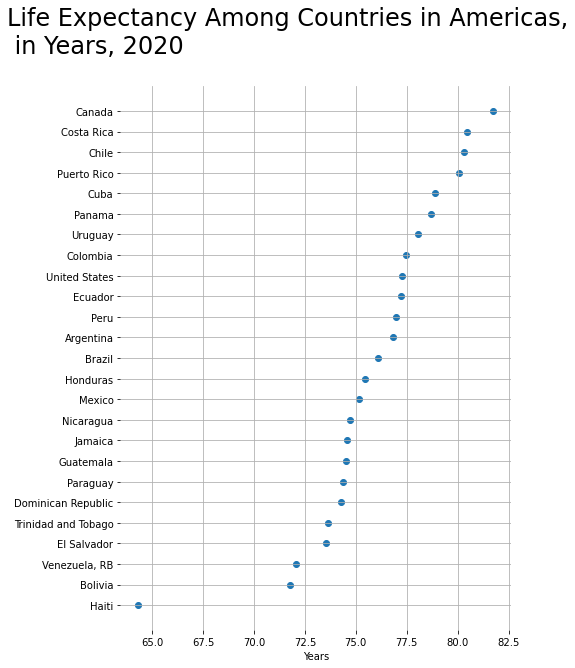

In [34]:
fig, ax = plt.subplots(figsize=(7,10))

ax.scatter(df_le['2020'], df_le['Country Name']) #values, labels

ax.set_xlabel('Years')

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set_title('Life Expectancy Among Countries in Americas,\n in Years, 2020', loc='left', fontsize=24,x=-0.29, y=1.05)

ax.grid()

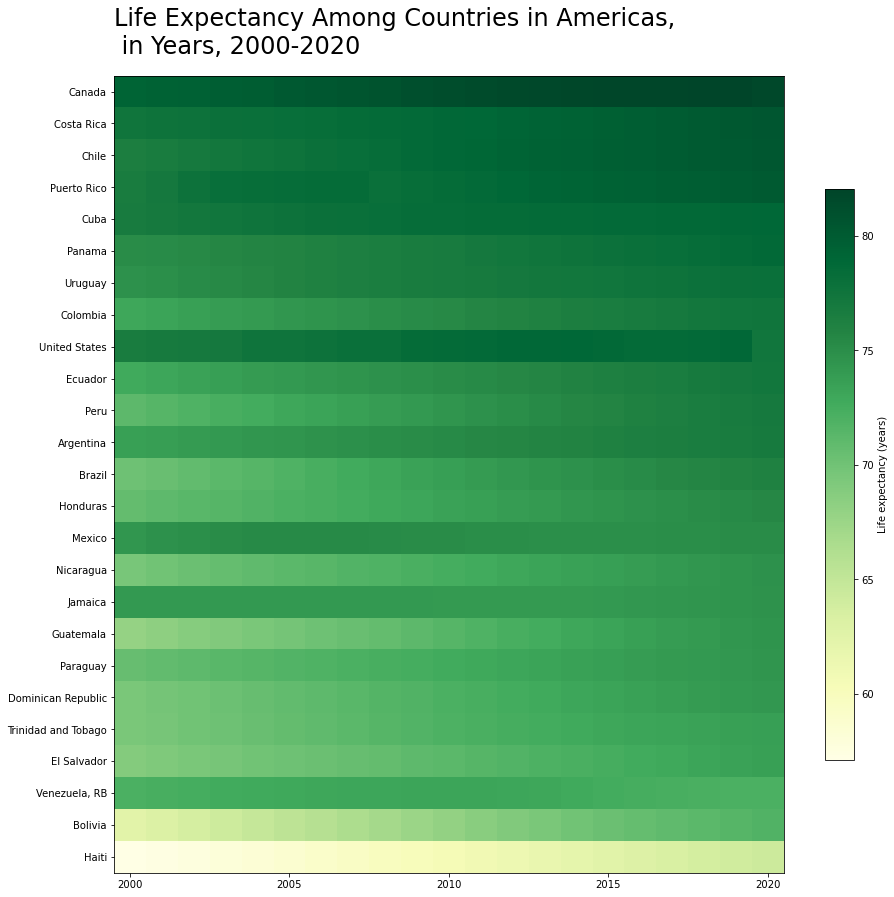

In [35]:
df_le = df_le.sort_values(by='2020', ascending=False)
years = df_le.columns[-22:-1]
x_pos = np.arange(len(years))
y_pos = np.arange(len(df_le))

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(df_le[years], cmap='YlGn')

# Create colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('Life expectancy (years)')

# show the labels
xpos_label = np.arange(len(years), step=5)
ax.set_xticks(xpos_label)
ax.set_xticklabels(years[xpos_label])

ax.set_yticks(y_pos)
ax.set_yticklabels(df_le['Country Name'])

ax.set_title('Life Expectancy Among Countries in Americas,\n in Years, 2000-2020', loc='left', fontsize=24,x=0, y=1.02)
plt.show()